In [2]:
import time
from encryption import encrypt
from decryption import decrypt
from diffie_hellman import generate_private_key, compute_public_key, compute_shared_key
from gen_p_q import generate_p_g

In [11]:
file_size = [32,126,200,246,280]
encryption_time = []
decryption_time = []


In [13]:
filenames = ['test32.png',	'test126.png', 'test200.png', 'test246.png', 'test280.png']

start = time.time()
p,g = generate_p_g(128)

private_key_A = generate_private_key(p)
public_key_A = compute_public_key(private_key_A,p,g)
end  = time.time()
key_gen_time = end-start

private_key_B= generate_private_key(p)
public_key_B= compute_public_key(private_key_B,p,g)



In [14]:
for i in range(5):
   start = time.time()
   shared_key_A = compute_shared_key(private_key_A,public_key_B,p)
   hmac_tag = encrypt(shared_key_A.hex(),filenames[i])
   end = time.time()
   encryption_time.append(end-start+key_gen_time)
   start = time.time()
   shared_key_B = compute_shared_key(private_key_B,public_key_A,p)
   decrypt(shared_key_B.hex(),hmac_tag,filenames[i])
   end = time.time()
   decryption_time.append(end-start+key_gen_time)
   
   

HMAC verification successful. Image integrity maintained.
HMAC verification successful. Image integrity maintained.
HMAC verification successful. Image integrity maintained.
HMAC verification successful. Image integrity maintained.
HMAC verification successful. Image integrity maintained.


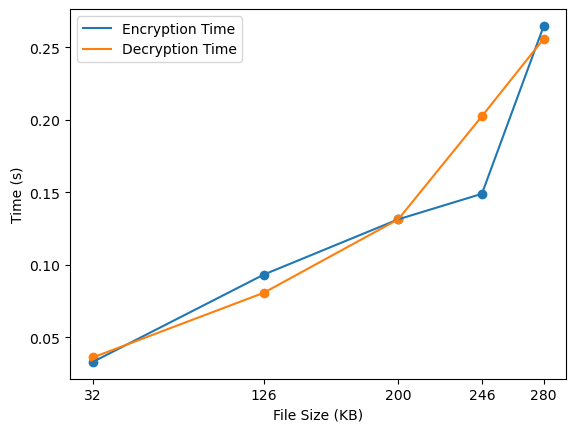

In [22]:
# plot line of of ecryption time and decryption time against file size
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_defaults()
plt.plot(file_size,encryption_time,label='Encryption Time')
plt.plot(file_size,decryption_time,label='Decryption Time')
plt.xlabel('File Size (KB)')
plt.ylabel('Time (s)')
# set x ticks as file size
plt.xticks(file_size)
plt.legend()
# show datapoints as bullets
plt.scatter(file_size,encryption_time)
plt.scatter(file_size,decryption_time)
plt.show()


In [23]:
des_enc_time = [0.27,0.83,1.19,1.44,1.67]
rsa_enc_time = [0.13,0.52,0.74,1.11,1.39]
aes_enc_time = [0.15,0.46,0.72,0.95,1.12]
des_dec_time = [0.44,0.65,0.85,1.23,1.45]
rsa_dec_time = [0.15,0.43,0.66,0.93,1.23]
aes_dec_time = [0.15,0.44,0.63,0.83,1.10]


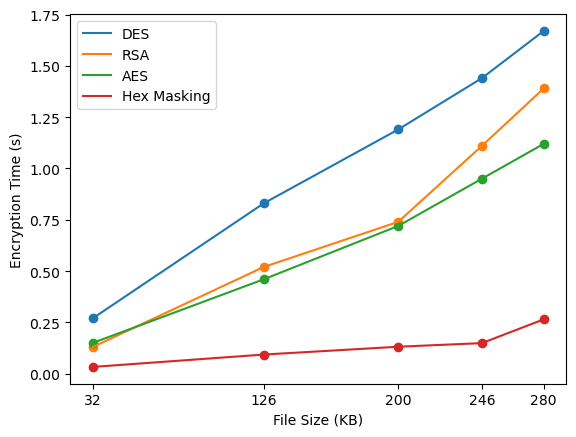

In [26]:
# plot encryption time vs file size for DES, RSA, AES and Hex Masking
plt.plot(file_size,des_enc_time,label='DES')
plt.plot(file_size,rsa_enc_time,label='RSA')
plt.plot(file_size,aes_enc_time,label='AES')
plt.plot(file_size,encryption_time,label='Hex Masking')
plt.xlabel('File Size (KB)')
plt.ylabel('Encryption Time (s)')
plt.xticks(file_size)
plt.legend()
plt.scatter(file_size,des_enc_time)
plt.scatter(file_size,rsa_enc_time)
plt.scatter(file_size,aes_enc_time)
plt.scatter(file_size,encryption_time)
plt.show()

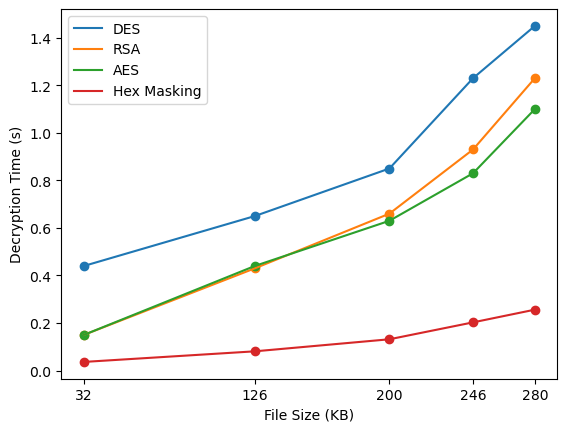

In [27]:
# plot decryption time vs file size for DES, RSA, AES and Hex Masking
plt.plot(file_size,des_dec_time,label='DES')
plt.plot(file_size,rsa_dec_time,label='RSA')
plt.plot(file_size,aes_dec_time,label='AES')
plt.plot(file_size,decryption_time,label='Hex Masking')
plt.xlabel('File Size (KB)')
plt.ylabel('Decryption Time (s)')
plt.xticks(file_size)
plt.legend()
plt.scatter(file_size,des_dec_time)
plt.scatter(file_size,rsa_dec_time)
plt.scatter(file_size,aes_dec_time)
plt.scatter(file_size,decryption_time)
plt.show()
